## Ising model, Monte Carlo simulation - Metropolis algorithm
    

In [9]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [10]:
class Grid(object):
    
    def __init__(self,N):
        self.N = N
        self.config = 2*np.random.randint(2, size=(N,N))-1
        
    def mc_move(self):
        '''MC move using Metropolis Algorithm'''
        for k in range(self.N):
            for m in range(self.N):
                x = np.random.randint(0, N)
                y = np.random.randint(0, N)
                s =  self.config[x, y]
                nb += self.config[(x-1)%N,y]
                nb += self.config[x,(y-1)%N]
                nb += self.config[(x+1)%N,y]
                nb += self.config[x,(y+1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                self.config[a, b] = s
        
    def equilibration(self, n_steps, T):
        iT = 1.0 / T
        for i in range(n_steps):         # equilibrate
            mc_move(config, iT)           # Monte Carlo moves
            
    def energy(self):
        ''' Calculate energy of given configuration'''
        E = 0
        for i in range(N):
            for j in range(N):
                s =  self.config[x, y]
                nb += self.config[(x-1)%N,y]
                nb += self.config[x,(y-1)%N]
                nb += self.config[(x+1)%N,y]
                nb += self.config[x,(y+1)%N]
                E += -nb*s
        return E/4
    
    def magnetization(self):
        ''' Calculate magnetization of configuration'''
        return np.sum(self.config)

In [11]:
## change these parameters for a smaller (faster) simulation 
nt      = 40         #  number of temperature points
N       = 12         #  size of the lattice, N x N
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T       = np.linspace(1, 4, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values


In [ ]:
grid = Grid(N)

In [ ]:
print(grid.config)

[[ 1  1 -1 -1  1 -1 -1  1  1 -1  1 -1]
 [-1  1 -1  1 -1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1 -1  1  1  1  1 -1  1]
 [ 1 -1  1 -1  1 -1  1  1  1 -1 -1  1]
 [ 1 -1 -1  1  1 -1  1 -1  1  1  1  1]
 [ 1  1  1  1  1  1  1 -1  1  1  1 -1]
 [-1 -1  1  1  1 -1  1 -1  1 -1  1  1]
 [ 1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1]
 [ 1  1 -1  1  1 -1 -1 -1  1  1 -1 -1]
 [-1  1 -1  1 -1  1  1  1 -1  1 -1 -1]
 [ 1  1  1 -1 -1  1  1 -1  1 -1  1  1]
 [-1  1  1  1  1  1  1  1  1 -1  1  1]]


In [5]:
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

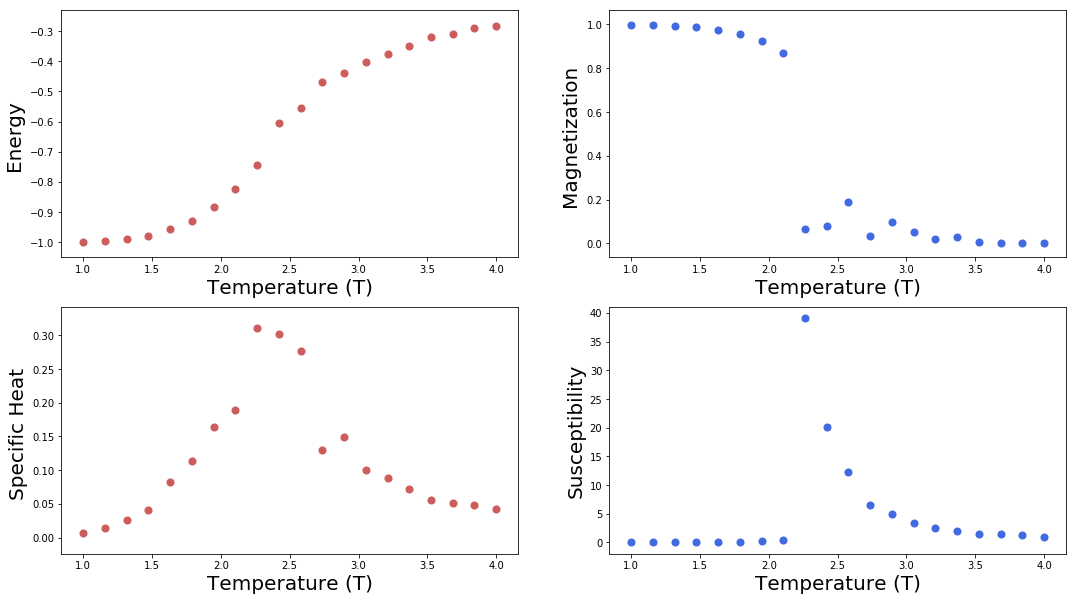

In [6]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');